# Document Image Classification with Document Image Transformer (DiT)

---

[Github](https://github.com/eugenesiow/practical-ml/blob/master/notebooks/Remove_Image_Background_DeepLabV3.ipynb) | More Notebooks @ [eugenesiow/practical-ml](https://github.com/eugenesiow/practical-ml)

---

Notebook to classify documents based on images of their contents. This task, called [Document Image Classification](https://paperswithcode.com/task/document-image-classification) might include classes of documents like letter, scientifica paper, form, email or resume.

The [model used](https://pytorch.org/hub/ultralytics_yolov5/) is a Document Image Transformer (DiT) model which is pre-trained on [IIT-CDIP](https://data.nist.gov/od/id/mds2-2531), a dataset that includes 42 million document images and fine-tuned on [RVL-CDIP](https://paperswithcode.com/dataset/rvl-cdip), a dataset consisting of 400,000 grayscale images in 16 classes, with 25,000 images per class.

The notebook is structured as follows:
* Setting up the Environment
* Getting Data
* Using the Model (Running Inference)

# Setting up the Environment

#### Setting up the Dependencies

First we `pip install` the required dependencies. This downloads and installs the python libraries required from the PyPi repository online.

In [9]:
!pip install -q transformers==4.25.1 pdf2image==1.16.0

Next we use install additional libraries to allow us to work with PDF files.

In [5]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.14).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


# Getting Data

### Getting Document Images

1. First we get a scientific/academic paper from OpenAI as a PDF file. Here we use `wget` to download the Whisper paper and save it as `whisper.pdf`. 

In [13]:
!wget https://cdn.openai.com/papers/whisper.pdf

--2022-12-19 08:34:23--  https://cdn.openai.com/papers/whisper.pdf
Resolving cdn.openai.com (cdn.openai.com)... 13.107.246.40, 13.107.213.40, 2620:1ec:bdf::40, ...
Connecting to cdn.openai.com (cdn.openai.com)|13.107.246.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857252 (837K) [application/pdf]
Saving to: ‘whisper.pdf’

whisper.pdf         100%[===================>] 837.16K  --.-KB/s    in 0.1s    

2022-12-19 08:34:24 (7.69 MB/s) - ‘whisper.pdf’ saved [857252/857252]



2. Next, we use the `pdf2image` library to convert the PDF and the cover page (page 0) to an image which is stored in the list `whisper_pages`.

In [5]:
from pdf2image import convert_from_path

# 100 is the size to convert the image to.
whisper_pages = convert_from_path('whisper.pdf', 100, first_page=0, last_page=1)

3. Next, we use `cv2_imshow()` to display this image to see our PDF cover page of the paper rendered as an image.

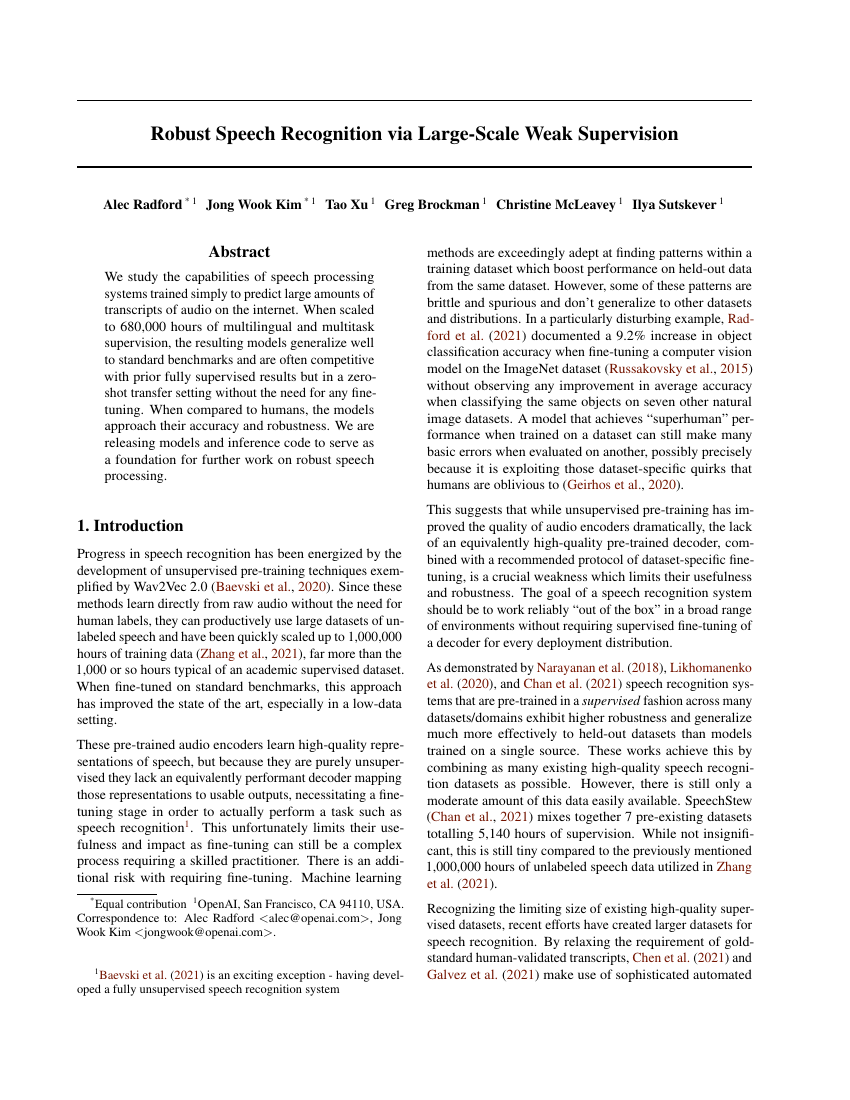

In [24]:
import numpy as np
from google.colab.patches import cv2_imshow

cv2_imshow(np.array(whisper_pages[0]))

4. Great! Now let's get a financial report from the National University of Singapore. We use `wget` once more.

In [21]:
!wget https://nus.edu.sg/docs/default-source/annual-report/nus-financial-report-2022.pdf

--2022-12-19 08:45:38--  https://nus.edu.sg/docs/default-source/annual-report/nus-financial-report-2022.pdf
Resolving nus.edu.sg (nus.edu.sg)... 45.60.33.225, 45.60.35.225
Connecting to nus.edu.sg (nus.edu.sg)|45.60.33.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1536893 (1.5M) [application/pdf]
Saving to: ‘nus-financial-report-2022.pdf’

nus-financial-repor 100%[===================>]   1.46M   768KB/s    in 2.0s    

2022-12-19 08:45:41 (768 KB/s) - ‘nus-financial-report-2022.pdf’ saved [1536893/1536893]



5. Again we use the `pdf2image` library to convert the PDF and one of the pages with the actual financial report (page 6) to an image which is stored in the list `nus_pages`.

In [18]:
from pdf2image import convert_from_path

nus_pages = convert_from_path('nus-financial-report-2022.pdf', 100, first_page=6, last_page=7)

6. We use `cv2_imshow()` to display this image to see our PDF page of financials with a table of numbers rendered as an image.

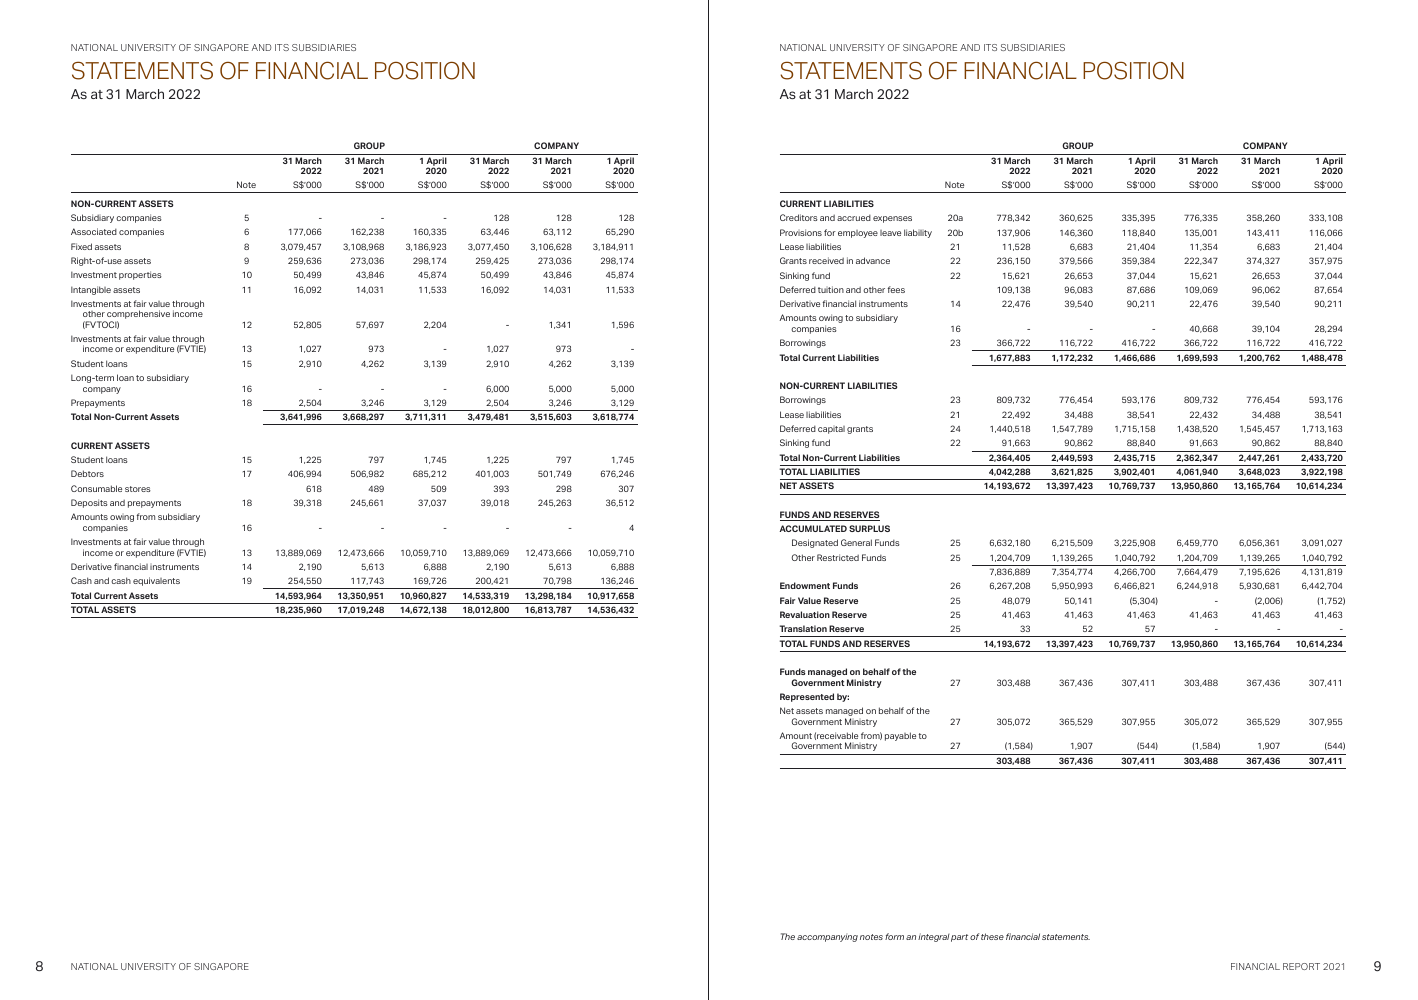

In [25]:
cv2_imshow(np.array(nus_pages[0]))

# Using the Model (Running Inference)

First we download and setup the model weights of the pre-trained model from the huggingface hub using the `transformers` library.

We download and load the [`dit-base-finetuned-rvlcdip`](https://huggingface.co/microsoft/dit-base-finetuned-rvlcdip) model using the convenience pipeline function in the library.

In [21]:
from transformers import pipeline

pipe = pipeline(task="image-classification", model="microsoft/dit-base-finetuned-rvlcdip")

/usr/local/lib/python3.8/dist-packages/transformers/models/beit/image_processing_beit.py:111: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


Now we can simply run the images that we have prepared against the pipeline to get the Document Image Classification results. First, we run the Whisper paper page image through the pipe. We see that the model is over 87% confident that this image is a scientific publication. That's right!

In [26]:
output_json = pipe(whisper_pages[0])
output_json

[{'score': 0.8787207007408142, 'label': 'scientific publication'},
 {'score': 0.02657017670571804, 'label': 'news article'},
 {'score': 0.02074269764125347, 'label': 'scientific report'},
 {'score': 0.006884910631924868, 'label': 'email'},
 {'score': 0.006216561887413263, 'label': 'file folder'}]

Next we try with the NUS financial report page and viola, we get over 90% confidence that its a budget document. That's the closest of the 16 classes and we've got that right too!

In [22]:
output_json = pipe(nus_pages[0])
output_json

[{'score': 0.9057689309120178, 'label': 'budget'},
 {'score': 0.007138940971344709, 'label': 'form'},
 {'score': 0.006847307551652193, 'label': 'presentation'},
 {'score': 0.006752100307494402, 'label': 'advertisement'},
 {'score': 0.006463303696364164, 'label': 'email'}]

You can save the images to a file using the `.save()` method.

In [27]:
nus_pages[0].save('nus_page.jpg', 'JPEG')
whisper_pages[0].save('whisper_page.jpg', 'JPEG')

We can connect to Google Drive with the following code. You can also click the `Files` icon on the left panel and click `Mount Drive` to mount your Google Drive.

The root of your Google Drive will be mounted to `/content/drive/My Drive/`. If you have problems mounting the drive, you can check out this [tutorial](https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

You can move the output files which are saved in the `/content/` directory to the root of your Google Drive.

In [ ]:
import shutil
shutil.move('/content/whisper_page.jpg', '/content/drive/My Drive/whisper_page.jpg')

More Notebooks @ [eugenesiow/practical-ml](https://github.com/eugenesiow/practical-ml) and do star or drop us some feedback on how to improve the notebooks on the [Github repo](https://github.com/eugenesiow/practical-ml/).